https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png

# **Histogram Representations**

####**In this lesson we'll learn:**
1. View the RGB Histogram representations of images
2. Use K-Means Clustering to get the dominant colors and their proportions in images


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



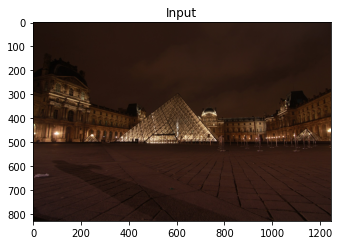

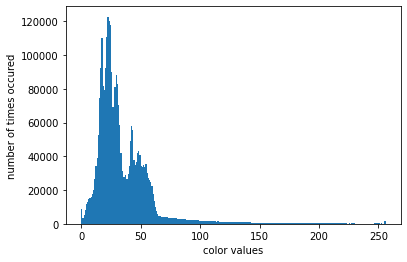

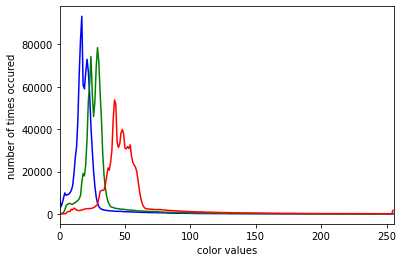

In [22]:
image = cv2.imread('Datasets//images/input.jpg')
imshow("Input", image)

# We plot a histogram, ravel() flatens our image array 
image_ravel = image.ravel()

"""In an image histogram, the x-axis represents the different color values, which lie between 0 and 255,
and the y-axis represents the number of times a particular intensity value occurs in the image."""

#bins oraliq, range-histogram x oqi oraligi
plt.hist(image_ravel,bins=256,range=[0, 256]) 
plt.xlabel('color values')
plt.ylabel('number of times occured')
plt.show()
#Demak ushbu rasmimiz qoraroq bo'lganligi uchun 0 va 50 orasidagi color valuelar
#ko'p bora takrorlangan

# Viewing Separate Color Channels
color = ('b', 'g', 'r') 

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[256],ranges=[0,256])
    plt.plot(histogram2,  color=col)
    plt.xlabel('color values')
    plt.ylabel('number of times occured')
    plt.xlim([0,256])


**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- **ranges** : this is our RANGE. Normally, it is [0,256].

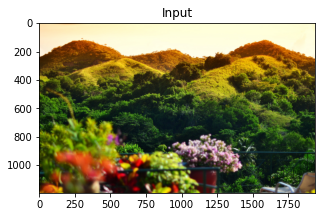

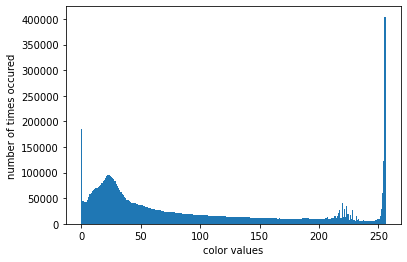

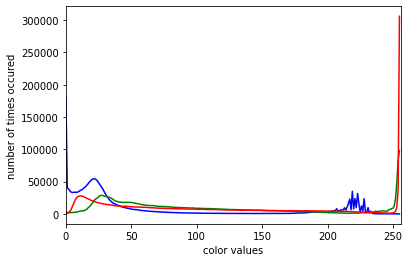

In [23]:
image = cv2.imread('Datasets/images/tobago.jpg')
imshow("Input", image)

# We plot a histogram, ravel() flatens our image array 
image_ravel = image.ravel()

"""In an image histogram, the x-axis represents the different color values, which lie between 0 and 255,
and the y-axis represents the number of times a particular intensity value occurs in the image."""

#bins oraliq, range-histogram x oqi oraligi
plt.hist(image_ravel,bins=256,range=[0, 256]) 
plt.xlabel('color values')
plt.ylabel('number of times occured')
plt.show()
#Demak ushbu rasmimiz qoraroq bo'lganligi uchun 0 va 50 orasidagi color valuelar
#ko'p bora takrorlangan

# Viewing Separate Color Channels
color = ('b', 'g', 'r') 

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[256],ranges=[0,256])
    plt.plot(histogram2,  color=col)
    plt.xlabel('color values')
    plt.ylabel('number of times occured')
    plt.xlim([0,256])


 # 2. **K-Means sklearn Clustering to obtain the dominant colors in an image**

In [24]:
def centroidHistogram(clt):
    # Create a histrogram for the clusters based on the pixels in each cluster
    # Get the labels for each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    # Create our histogram 
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, so that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plotColors(hist, centroids):
    # Create our blank barchart
    bar = np.zeros((100, 500, 3), dtype = "uint8")

    x_start = 0
    # iterate over the percentage and dominant color of each cluster
    for (percent, color) in zip(hist, centroids):
      # plot the relative percentage of each cluster
        end = x_start + (percent * 500)
        cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),
        color.astype("uint8").tolist(), -1)
        x_start = end
    return bar

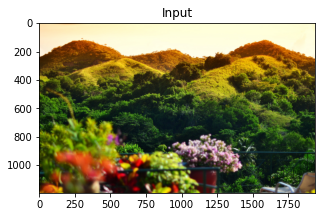

(1194, 1936, 3)
(2311584, 3)


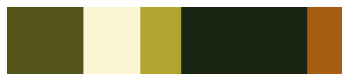

In [25]:
from sklearn.cluster import KMeans

image = cv2.imread('Datasets/images/tobago.jpg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

K = 5 #number of Klaster. biz ajratmoqchi bo'lgan ranglar
kmeans = KMeans(K)
kmeans.fit(image)

hist = centroidHistogram(kmeans)
bar = plotColors(hist, kmeans.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [26]:
# Boshqa example

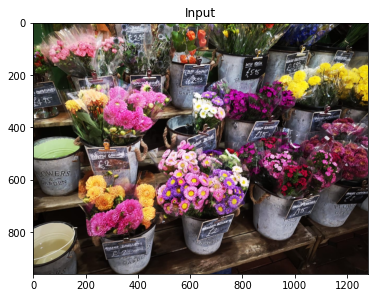

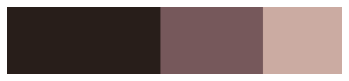

In [29]:
from sklearn.cluster import KMeans

image = cv2.imread('Datasets/images/flowers.jpeg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

number_of_clusters = 3
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

# 3. OpenCv Kmeans

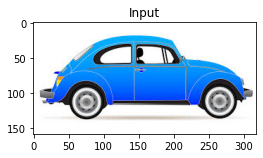

(50562, 3)
[[ 13 129 248]
 [ 64  62  62]
 [249 249 249]]


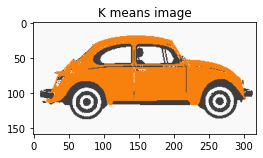

In [48]:
image = cv2.imread('Datasets/images/beatle.jpg')
imshow("Input", image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
re_image = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
print(re_image.shape)
#image must be float for Kmeans algorithm
re_image = np.float32(re_image)

#criteria ga Criteria metodi, 10-iteratsiya soni necha marta loop bolishi, 1.0 - bu epsilon 1.0 - 100 foiz aniqlikda
#0.5- bolsa 50% aniqlikda bo'ladi.
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0) 

#K - bu cluster soni
K=3

# parametrlari (data,K,Label bolmasa None, criteria,attempt(iterate algorithm),)
#kmeans algoritmi summa (centerdan nuqtalargacha bolgan masofalar yigindisi,
#label- Label bolsa label, bizi holatda yoq chunki ozi qoyadi shuning uchun None 
#center - random point center kordinatasi 

summa, label, center = cv2.kmeans(re_image,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

#RGB format bolgani uchun 3 talik center point chiqaradi. Ya'ni 3 ta x,y,z oqida joylashgan.
center = np.uint8(center)
print(center)
 

label = label.reshape(image.shape[0], image.shape[1])
krasm = center[label.flatten()]
krasm = krasm.reshape(image.shape)
imshow("K means image", krasm)

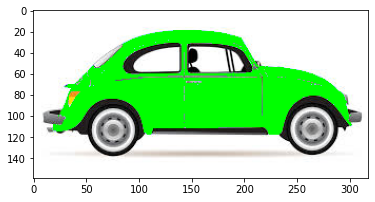

In [54]:
#rasmning label==0 ga teng bolgan indexlarini qizil [255,0,0] rangga tenglab bemalol uni ozgartirishimz mumkun. 
rasmcopy = np.copy(image)
rasmcopy[label==0] = [0,255,0]
plt.imshow(rasmcopy)